<a href="https://colab.research.google.com/github/brunolunarj/cienciadedados/blob/main/MPV012023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP PUCRIO - Sprint I: Análise de Dados e Boas Práticas**

**Por Bruno de Amorim Luna**

## 1 - DEFINIÇÃO DO PROBLEMA
---




O **Instituto Nacional de Seguro Social - INSS** caracteriza-se como uma organização pública prestadora de serviços previdenciários para a sociedade brasileira.
Fazer análise dos dados Previdenciários dos benefícios de **Auxílio-Doença (B31) e Auxílio-Doença por Acidente de trabalho (B91), *CONCEDIDOS* no ano de 2022** pelo **INSS** e verificar insigts para melhorar a análise e concessão dos benefícios por incapacidade, além de analisar a RMI (Renda Mensal) e em que etapa estão as concessões buscando dados para melhorá-las. <br>
Os dados foram retirados do sistema de Banco de Dados interno nos moldes do fornecido no  Dados Abertos do Instituto (https://dados.gov.br/dados/organizacoes/visualizar/instituto-nacional-de-seguro-social-inss).



**Dicionário de Dados - Atributos (COLUNAS)**
>**0   Competência concessão** - Mês que foi concedido o benefício <br>
>**1   Espécie** - Espécie do benefício Previdenciário <br>
>**2   CID** - Codigo Internacional de Doenças <br>
>**3   Despacho** - Tipo de concessão <br>
>**4   Dt Nascimento** - Data de nascimento do benefício <br>
>**5   Sexo.** - Sexo Masculino ou Feminino <br>
>**6   Clientela** - Especificação do benefício por zona (Rural e Urbana) <br>
>**7   Tipo de Cálculo** - Como é calculado do benefício <br>
>**8   Mun. Resid.** - Município do Segurado do benefício <br>
>**9   Estado** - Estado do Segurado do benefício <br>
>**10  Forma Filiação** - Filiação do Segurado no momento da concessão <br>
>**11  Qt SM RMI** - Quantidade de Salário Mínimo da Renda Mensal Inicial(RMI) <br>

## 2 - COLETA E ANÁLISE INICIAL DOS DADOS

---



### 2.1 - IMPORTAÇÃO DE PACOTES E COLETA DOS DADOS

In [106]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder  # one-hot encoding e dummy encoding
from sklearn.model_selection import train_test_split
#from google.colab import drive
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#Carregando planilhas do Excel com os dados em dataframes
df_ben =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC012022.xlsx?raw=true')
df_ben2 =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC022022.xlsx?raw=true')
df_ben3 =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC032022.xlsx?raw=true')
df_ben4 =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC042022.xlsx?raw=true')
#df_ben =  pd.read_excel('CONC012022.xlsx') 
#df_ben2 =  pd.read_excel('CONC022022.xlsx') #Carregando planilhas Localmente
#df_ben3 =  pd.read_excel('CONC032022.xlsx')
#df_ben4 =  pd.read_excel('CONC042022.xlsx')
display(df_ben[:2])
display(df_ben2[:2])
display(df_ben3[:2])
display(df_ben4[:2])
df_ben4.shape

,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202201,Auxílio Doenca Previdenciário,K40 Hernia Inguinal,Revisao Administrativa,1970-05-23,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Desempregado,1.183
1,202201,Auxílio Doenca Previdenciário,I25.9 Doenc Isquemica Cronica do Coracao Ne,Concessao Normal,1962-08-31,Masculino,Rural,Rmi Informada/Salã¡Rio M,Batalha,AL,Segurado Especial,1.000


,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202204,Auxílio Doenca Previdenciário,T92.8 Sequelas de Outr Traum Espec do Membro,Concessao Normal,1968-02-08,Feminino,Urbano,Calculo na Dib sem Fator,Maceió,AL,Doméstico,1.000
1,202204,Auxílio Doenca Previdenciário,S52.2 Frat da Diafise do Cubito,Concessao Normal,1998-01-15,Masculino,Urbano,Calculo na Dib sem Fator,Maceió,AL,Desempregado,1.305


,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202207,Auxílio Doenca Previdenciário,S42.2 Frat da Extremidade Super do Umero,Concessao Normal,2000-12-30,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Autônomo,1.0
1,202207,Auxílio Doenca Previdenciário,T93.1 Sequelas de Frat do Femur,Concessao Normal,1974-08-26,Masculino,Urbano,Calculo na Dib sem Fator,Delmiro Gouveia,AL,Desempregado,1.0


,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202210,Auxílio Doenca Previdenciário,S92.0 Frat do Calcaneo,Concessao Normal,1972-11-14,Feminino,Urbano,Calculo na Dib sem Fator,São Paulo,SP,Desempregado,1.0
1,202210,Auxílio Doenca Previdenciário,N20 Calculose do Rim e do Ureter,Revisao Administrativa,1972-04-20,Feminino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Empregado,1.0


(508464, 12)

### 2.2 - JUNTANDO AS PLANILHAS


In [107]:
#Criando um novo Dataframe e juntando os DF anteriores
df_ben = pd.concat([df_ben, df_ben2, df_ben3, df_ben4], ignore_index=True)
df_ben.head() #df_ben[:5]

,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202201,Auxílio Doenca Previdenciário,K40 Hernia Inguinal,Revisao Administrativa,1970-05-23,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Desempregado,1.183
1,202201,Auxílio Doenca Previdenciário,I25.9 Doenc Isquemica Cronica do Coracao Ne,Concessao Normal,1962-08-31,Masculino,Rural,Rmi Informada/Salã¡Rio M,Batalha,AL,Segurado Especial,1.000
2,202201,Auxílio Doenca Previdenciário,S92.4 Frat do Halux,Concessao Normal,1997-10-15,Masculino,Urbano,Rmi Informada/Salã¡Rio M,Arapiraca,AL,Empregado,1.000
3,202201,Auxílio Doenca Previdenciário,B34.2 Infecc p/Coronavirus Ne,Concessao Normal,1999-10-15,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Desempregado,1.000
4,202201,Auxílio Doenca Previdenciário,I83.2 Varizes Membros Infer c/Ulcera e Inflam,Revisao Administrativa,1975-04-04,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Autônomo,1.000


### 2.3 - ANÁLISE INICIAL DOS DADOS


In [108]:
#Buscando as informações Básicas do DF: quantidade de linhas e colunas, os tipos de dados de cada coluna, etc.
df_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883139 entries, 0 to 1883138
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Competência concessão  int64         
 1   Espécie                object        
 2   CID                    object        
 3   Despacho               object        
 4   Dt Nascimento          datetime64[ns]
 5   Sexo.                  object        
 6   Clientela              object        
 7   Tipo de Cálculo        object        
 8   Mun. Resid.            object        
 9   Estado                 object        
 10  Forma Filiação         object        
 11  Qt SM RMI              float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 172.4+ MB


In [109]:
#Verificar todos os valores nulos do DF
df_ben.isnull().sum()

Competência concessão     0
Espécie                   0
CID                       0
Despacho                  0
Dt Nascimento             0
Sexo.                     0
Clientela                 0
Tipo de Cálculo           0
Mun. Resid.              18
Estado                    0
Forma Filiação            0
Qt SM RMI                 0
dtype: int64

In [110]:
#Verificar todos os valores NA do DF
df_ben.isna().sum()

Competência concessão     0
Espécie                   0
CID                       0
Despacho                  0
Dt Nascimento             0
Sexo.                     0
Clientela                 0
Tipo de Cálculo           0
Mun. Resid.              18
Estado                    0
Forma Filiação            0
Qt SM RMI                 0
dtype: int64

In [111]:
list_despacho = df_ben['Despacho'].unique()
display(list_despacho)

array(['Revisao Administrativa', 'Concessao Normal', 'Acao Judicial',
       'Revisão Médica', 'Recurso',
       'Concessao com Diligencia (Rd ou Sp)     '], dtype=object)

In [112]:
df_ben['Competência concessão'].unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212])

No Dataframe, existe **12 atributos (colunas) e 1883139 linhas**.
18 valores NA ou nulos no atributo Mun. Resid.
Quase todos os atributos são object, com exceção de Competência concessão que é int, Dt Nascimento que é datetime e Qt SM RMI que é float. Deve ser trocado o tipo do atributo Competência concessão para não haver cálculo com os mêses do ano, e a extração do ano de nascimento para que possamos calcular a idade do segurado.

## 3 - PRÉ-PROCESSAMENTO

---



### 3.1 - LIMPEZA DE DADOS

In [113]:
#Apagar coluna Tipo de Cálculo
df_ben = df_ben.drop(columns=['Tipo de Cálculo'])
df_ben = df_ben.drop(columns=['Mun. Resid.'])
df_ben.columns

Index(['Competência concessão', 'Espécie', 'CID', 'Despacho', 'Dt Nascimento',
       'Sexo.', 'Clientela', 'Estado', 'Forma Filiação', 'Qt SM RMI'],
      dtype='object')

In [114]:
#Mudando o atributo Dt Nascimento para ano, para calcular a Idade do Segurado
df_ben['Dt Nascimento'] = df_ben['Dt Nascimento'].dt.year
idade = 2022 - (df_ben['Dt Nascimento'])
df_ben['Dt Nascimento'] = idade
df_ben['Dt Nascimento'].describe()

count    1.883139e+06
mean     4.372441e+01
std      1.168119e+01
min      1.300000e+01
25%      3.500000e+01
50%      4.400000e+01
75%      5.300000e+01
max      9.700000e+01
Name: Dt Nascimento, dtype: float64

In [115]:
#Trocando os nomes das colunas
df_ben = df_ben.rename(columns={'Competência concessão':'Competência','Dt Nascimento':'Idade','Sexo.':'Sexo','Clientela':'Zona','Forma Filiação':'Filiação'})
df_ben.columns

Index(['Competência', 'Espécie', 'CID', 'Despacho', 'Idade', 'Sexo', 'Zona',
       'Estado', 'Filiação', 'Qt SM RMI'],
      dtype='object')

In [116]:
#Apaga espaços em branco no inicio e fim da linha conforme coluna
df_ben['Espécie'] = df_ben['Espécie'].str.strip()
df_ben['CID'] = df_ben['CID'].str.strip()
df_ben['Despacho'] = df_ben['Despacho'].str.strip()
df_ben['Sexo'] = df_ben['Sexo'].str.strip()
df_ben['Zona'] = df_ben['Zona'].str.strip()

In [117]:
#Apaga todas as linhas que tenham valor NaN (Missings)
df_ben = df_ben.dropna()
#df_ben.isna().sum()
df_ben.shape

(1883139, 10)

In [118]:
#Muda o Tipo da coluna competencia para Objeto (String) 
df_ben['Competência'] = df_ben['Competência'].astype(str)
df_ben['Competência'] = df_ben['Competência'].str.replace('2022','')
df_ben.info()
list_competencia = df_ben['Competência'].unique()
print(list_competencia)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883139 entries, 0 to 1883138
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Competência  object 
 1   Espécie      object 
 2   CID          object 
 3   Despacho     object 
 4   Idade        int64  
 5   Sexo         object 
 6   Zona         object 
 7   Estado       object 
 8   Filiação     object 
 9   Qt SM RMI    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 143.7+ MB
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


Foram realizadas as limpezas necessárias para trabalhar com o Dataset: com eliminação atributos que não serão usados, eliminação das linhas que possui missing, alteração de tipo de atributo e apagando espaços em branco nos valores do Dataset. 

### 3.2 - Resumo Estatístico

In [119]:
#Verificando os valores numéricos dos atributos Idade e Qt SM RMI
df_ben[['Idade','Qt SM RMI']].describe()

,Idade,Qt SM RMI
count,1.883139e+06,1.883139e+06
mean,4.372441e+01,1.423865e+00
std,1.168119e+01,6.924423e-01
min,1.300000e+01,9.000000e-02
25%,3.500000e+01,1.000000e+00
50%,4.400000e+01,1.140000e+00
75%,5.300000e+01,1.540000e+00
max,9.700000e+01,7.572000e+00


In [120]:
#Descobrindo a moda do DataFrame
df_ben.mode()

,Competência,Espécie,CID,Despacho,Idade,Sexo,Zona,Estado,Filiação,Qt SM RMI
0,08,Auxílio Doenca Previdenciário,Em Branco,Concessao Normal,41,Masculino,Urbano,SP,Empregado,1.0


In [121]:
#Descobrindo a média das colunas Idade e Qt SM RMI do DataFrame
df_ben[['Idade','Qt SM RMI']].mean()

Idade        43.724409
Qt SM RMI     1.423865
dtype: float64

In [122]:
#Descobrindo o valor mínimo das colunas Idade e Qt SM RMI do DF
df_ben[['Idade','Qt SM RMI']].min()

Idade        13.00
Qt SM RMI     0.09
dtype: float64

In [123]:
#Descobrindo o valor máximo das colunas Idade e Qt SM RMI do DF
df_ben[['Idade','Qt SM RMI']].max()

Idade        97.000
Qt SM RMI     7.572
dtype: float64

In [124]:
#Descobrindo o desvio Padrão das colunas Idade e Qt SM RMI
df_ben[['Idade','Qt SM RMI']].std()

Idade        11.681190
Qt SM RMI     0.692442
dtype: float64

In [125]:
df_ben.shape

(1883139, 10)

Aqui podemos verificar as estatísticas dos atributos numéricos Idade e Qt SM RMI, sendo:
        Idade        Qt SM RMI
Média: 43.724409     1.423865
Moda:  41            1.423865
Min: 13.00           0.09
Max: 97.00           7.572
Desvio Padrão: 11.681190   0.692442

### 3.3 - Plotando os gráficos

Text(0, 0.5, 'Total de Processos Concluído/Mês')

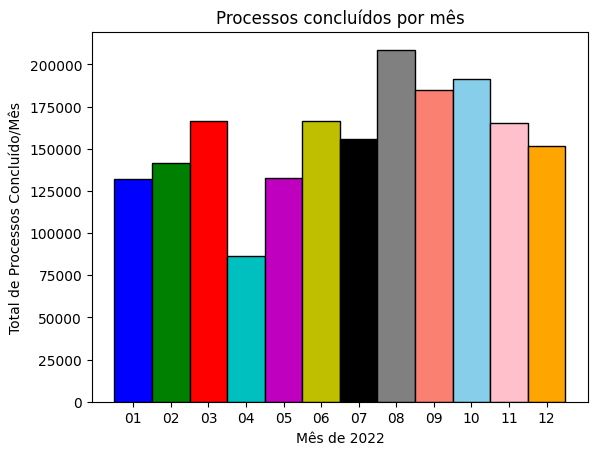

In [126]:
#Gráfico em Histograma de Total de Processos Concedidos por Mês
ax= sns.histplot(df_ben['Competência'])
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray','salmon','skyblue','pink','orange']
for i in range(0,12):
    ax.patches[i].set_facecolor(color[i])
plt.title('Processos concluídos por mês')
plt.xlabel('Mês de 2022')
plt.ylabel('Total de Processos Concluído/Mês') 

Text(0.5, 0, 'Mês de 2022')

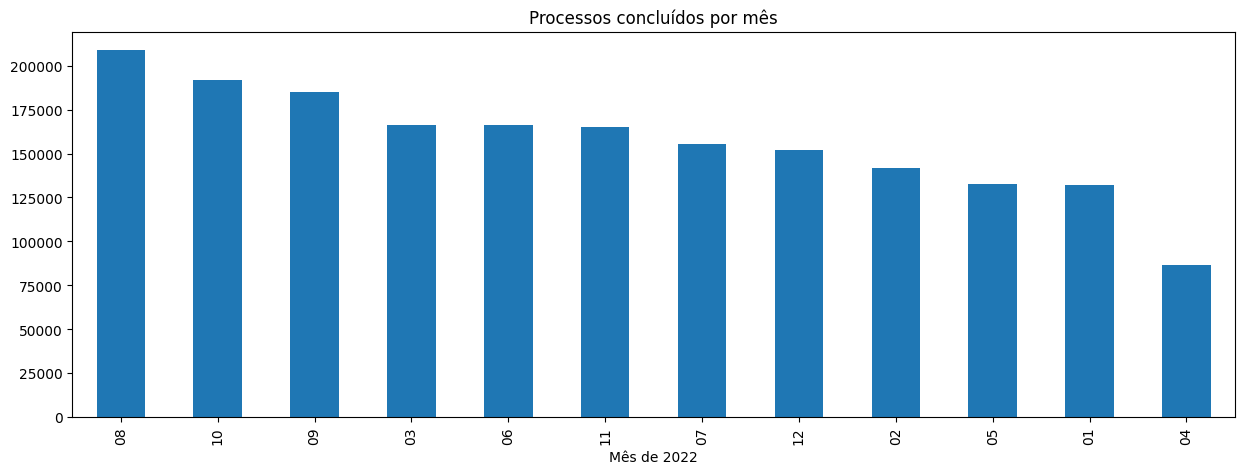

In [127]:
#Gráfico Total de Processos Concedidos por Mês
competencia = df_ben['Competência'].value_counts() #
competencia.plot(figsize=(15,5),kind='bar')
plt.title('Processos concluídos por mês')
plt.xlabel('Mês de 2022')

Text(0.5, 0, 'Meses de 2022')

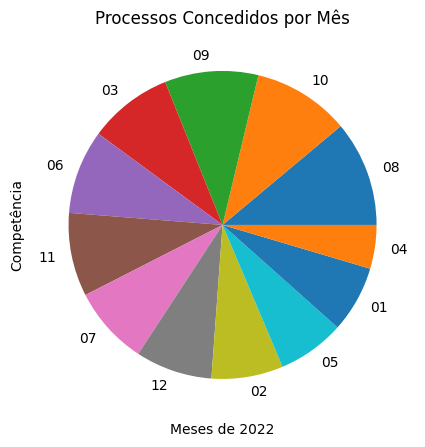

In [128]:
#Gráfico de Pizza do Total de Processos Concedidos por Mês
competencia = df_ben['Competência'].value_counts()
competencia.plot(figsize=(15,5), kind='pie')
plt.title('Processos Concedidos por Mês')
plt.xlabel('Meses de 2022')

Plotado os gráficos, podemos verificar a Qtd de processos por Competência. Podemos verificar que o mês de Agosto (08) é o que tem mais processos concluídos e o mês de Abril(04) do menor.

Text(0.5, 0, 'Espécies')

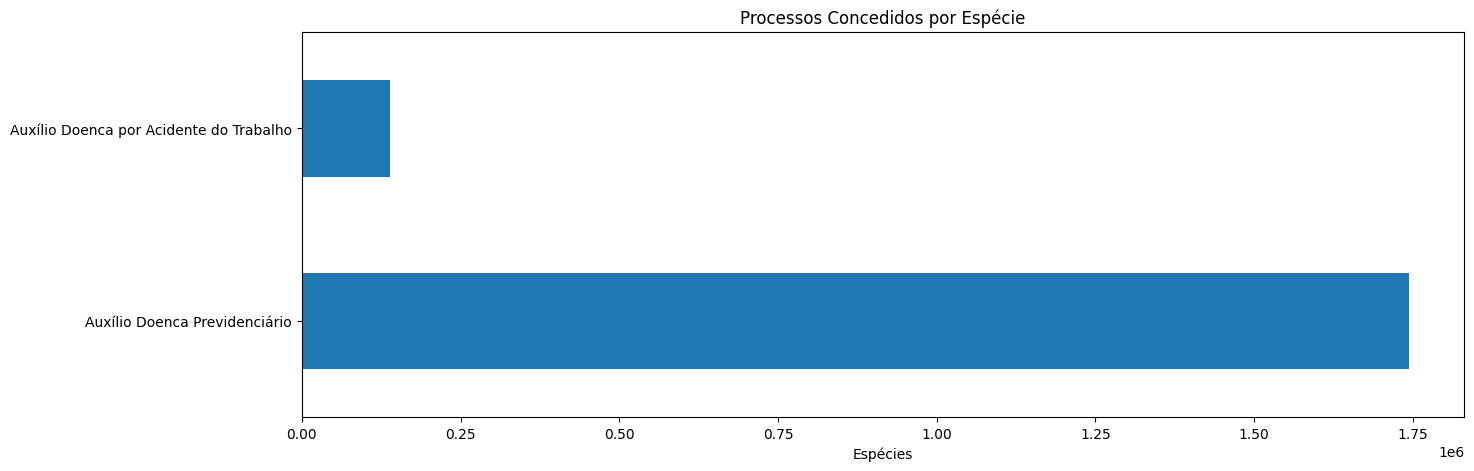

In [129]:
#Barra H do Total de Processos Concedidos por Espécies
competencia = df_ben['Espécie'].value_counts()
competencia.plot(figsize=(15,5), kind='barh')
plt.title('Processos Concedidos por Espécie')
plt.xlabel('Espécies')


Concessao Normal                       1659055
Acao Judicial                           162440
Revisao Administrativa                   58389
Recurso                                   3212
Revisão Médica                              42
Concessao com Diligencia (Rd ou Sp)          1
Name: Despacho, dtype: int64

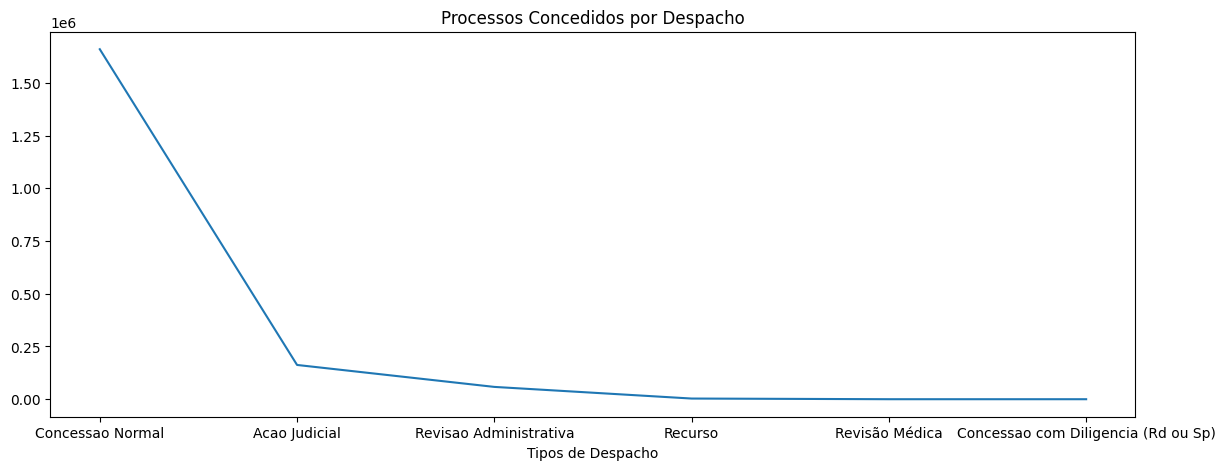

In [130]:
#QTD por despacho
despacho = df_ben['Despacho'].value_counts()
despacho.plot(figsize=(14,5))
plt.title('Processos Concedidos por Despacho')
plt.xlabel('Tipos de Despacho')
display(despacho)

Text(0.5, 0, 'Sexo')

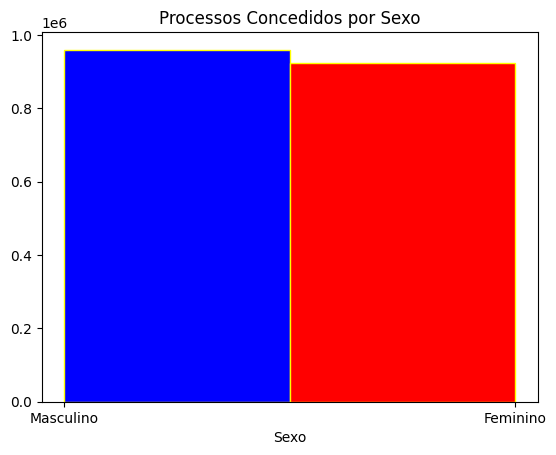

In [131]:
#Gráfico em Histograma de processos concluídos por Sexo
fig, ax = plt.subplots()
cor = ['b','r']
ax.hist(df_ben['Sexo'], bins=2, edgecolor='yellow') 
for i in range(0,2):
    ax.patches[i].set_facecolor(cor[i])
ax.set_title('Processos Concedidos por Sexo')
ax.set_xlabel('Sexo')

Text(0.5, 0, 'Filiação')

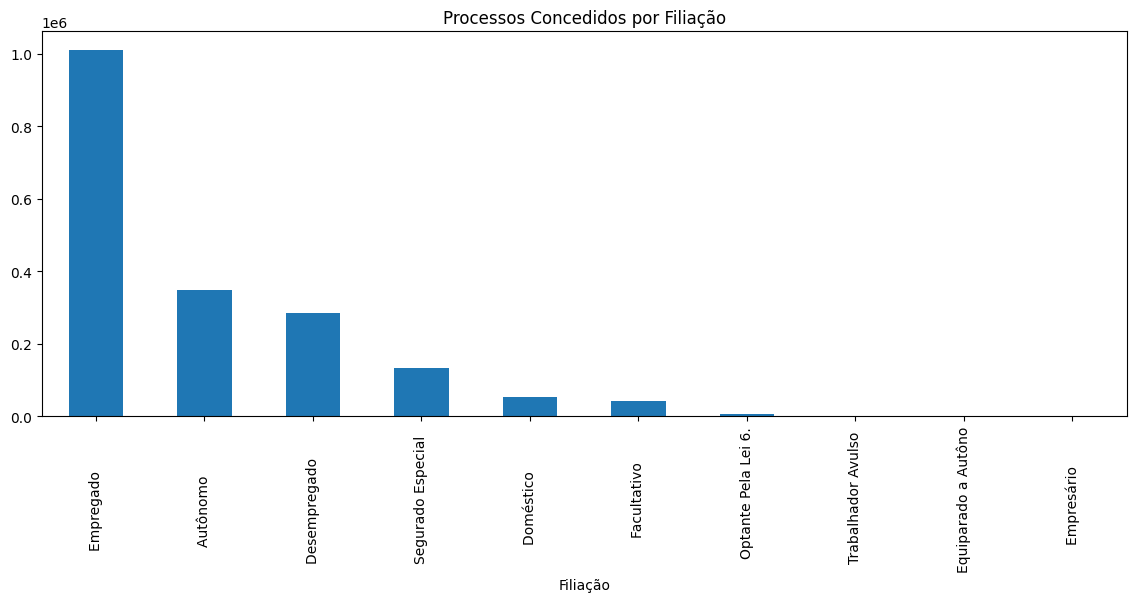

In [132]:
#Gráfico do Total de Processos Concedidos por Filiação
#df_ben['Filiação'].unique()
filiacao = df_ben['Filiação'].value_counts()
filiacao.plot(figsize=(14,5), kind='bar')
plt.title('Processos Concedidos por Filiação')
plt.xlabel('Filiação')

Text(0.5, 0, 'Estado')

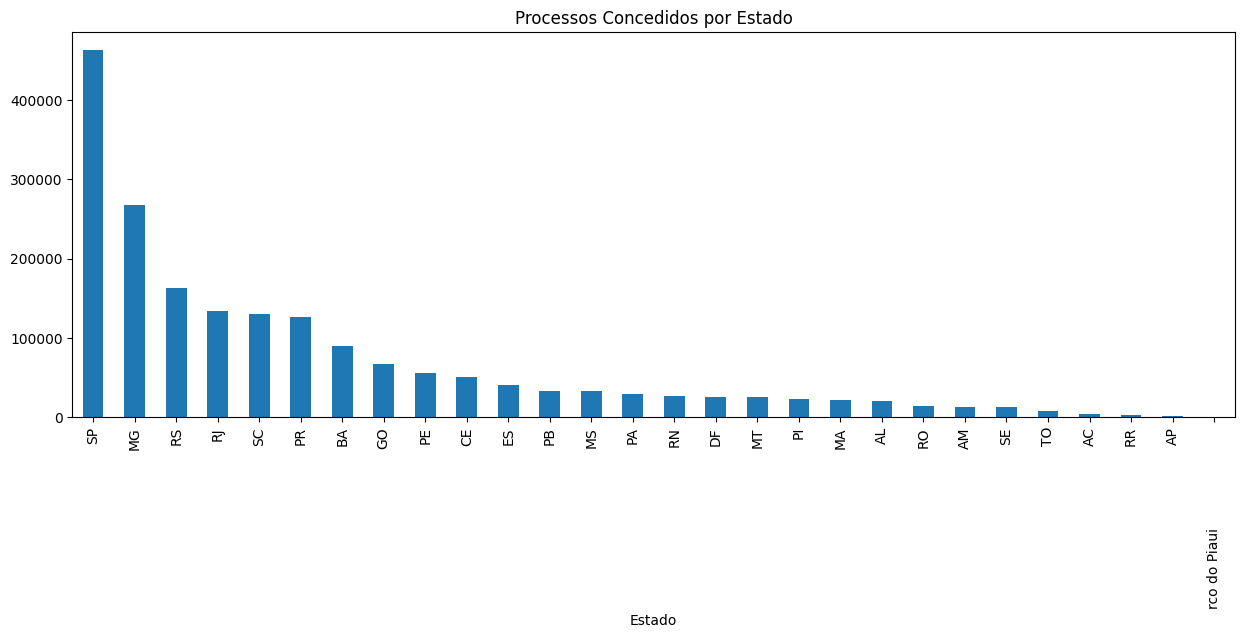

In [133]:
#Gráfico em Barra do Total de Processos Concedidos por Estado(UF)
estado = df_ben['Estado'].value_counts()
estado.plot(figsize=(15,5), kind='bar')
plt.title('Processos Concedidos por Estado')
plt.xlabel('Estado')

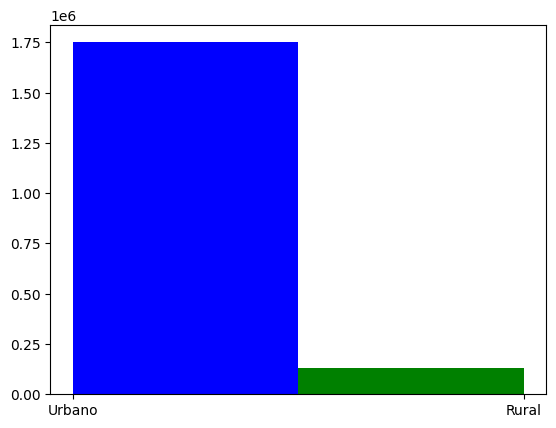

In [134]:
#Gráfico em Histograma do Total de Processos Concedidos por Zona
fig, ax = plt.subplots()
ax.hist(df_ben['Zona'], bins=2)
cor=['blue', 'green']
for i in range(0,2):
    ax.patches[i].set_facecolor(cor[i])

Podemos verificar que a maior parte dos Processos Concedidos são: da Espécie de Auxílio-Doença, Despacho Normal, Sexo Masculino, Filiação Empregado, do Estado de São Paulo e Zona Urbana.

Text(0, 0.5, 'QTD Salário Minimo RMI')

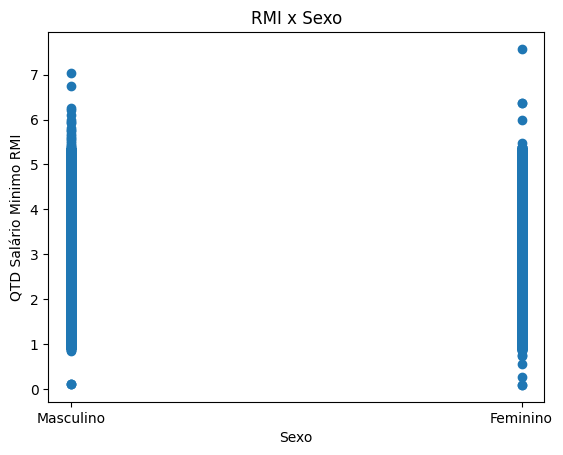

In [135]:
#Gráfico de Dispersão Sexo por Qt SM RMI
plt.scatter(df_ben['Sexo'],df_ben['Qt SM RMI'])
plt.title('RMI x Sexo')
plt.xlabel('Sexo')
plt.ylabel('QTD Salário Minimo RMI')

Text(0, 0.5, 'Mês')

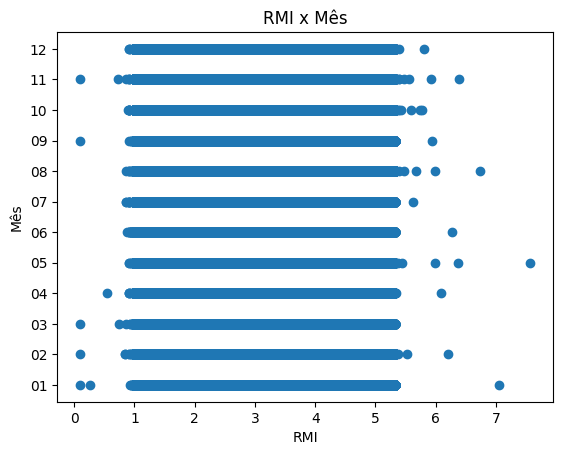

In [136]:
#Gráfico de Dispersão Qt SM RMI x Competência (Mês)
plt.scatter(df_ben['Qt SM RMI'],df_ben['Competência'])
plt.title('RMI x Mês')
plt.xlabel('RMI')
plt.ylabel('Mês')

O RMI do Sexo Masculino é ligeiramente maior. O SM do RMI dificil de estimar a competência em que esteve mais alta através do gráfico de Dispersão. 

Text(0.5, 1.0, 'Quantidade de Salário Mínimo em 2022')

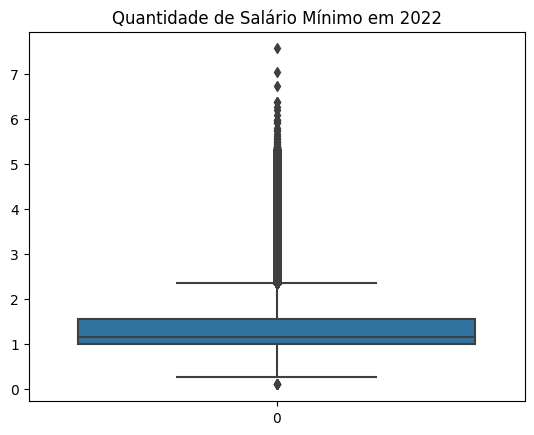

In [137]:
#Gráfico Boxplot da Quantidade de Salário Mínimo
sns.boxplot(data = df_ben['Qt SM RMI'])
plt.title('Quantidade de Salário Mínimo em 2022')

(12, 1)

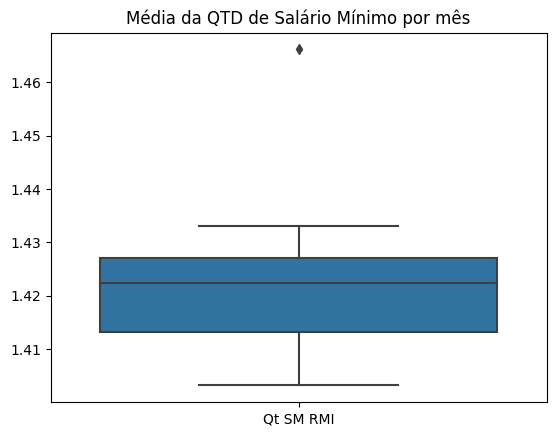

In [138]:
#Gráfico Boxplot da Média de Salário Mínimo RMI por mês
rmi_mes = df_ben.loc[:,['Competência','Qt SM RMI']]
rmi_mes = rmi_mes.groupby('Competência').mean()
sns.boxplot(data = rmi_mes)
plt.title('Média da QTD de Salário Mínimo por mês')
display(rmi_mes.shape)

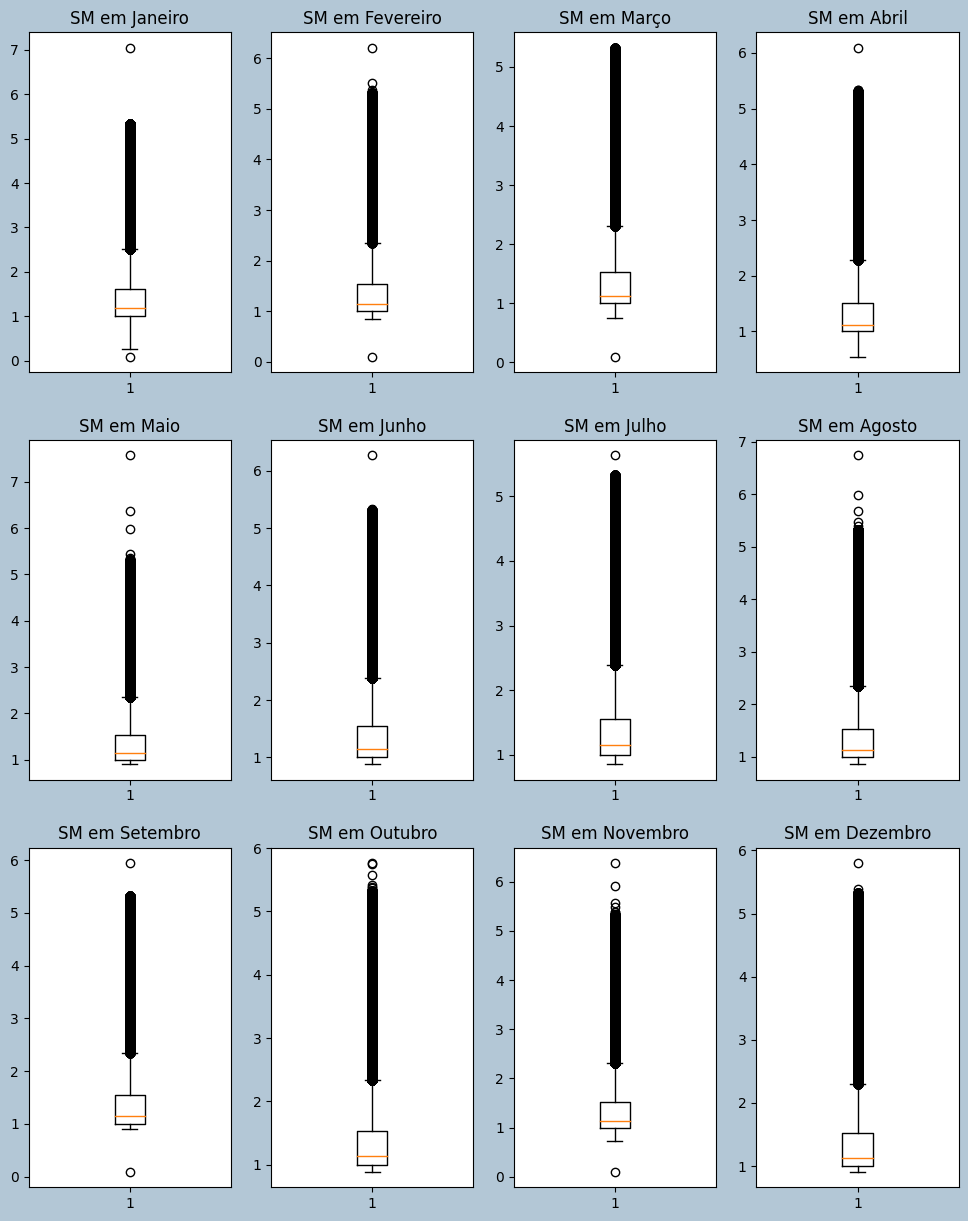

In [139]:
#Boxplots da QTD de Salário Mínimo RMI por mês
fig, ax = plt.subplots(3,4, figsize = (12, 15),facecolor='#B3C7D6')

# subplot1: boxplot
competencia_var = df_ben['Competência'].unique()
y = 0
z = 0
for i, mes in enumerate(competencia_var):
    meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
    y= i%4
    z= i//4
    rmi_01 = df_ben.loc[df_ben['Competência'] == mes,['Competência','Qt SM RMI']]
    ax[z,y].boxplot(rmi_01['Qt SM RMI'])
    ax[z,y].set_title(f'SM em {meses[i]}')
    #print(i,z,y)
        

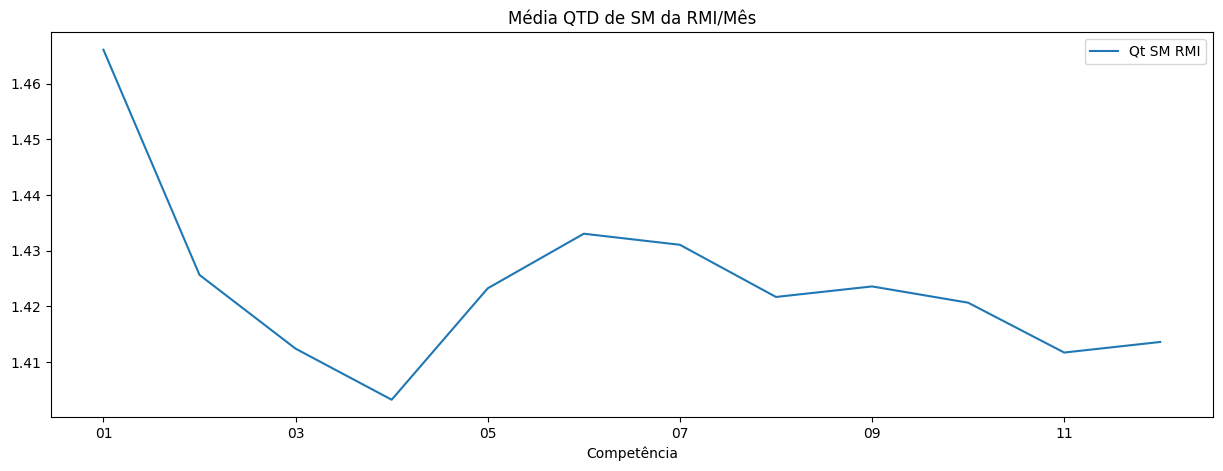

In [140]:
#Gráfico de Linhas da QTD de SM da RMI por mês
rmi_mes.plot(figsize=(15,5), kind='line')
plt.title('Média QTD de SM da RMI/Mês')
plt.legend();

Text(0.5, 1.0, 'Densidade Média do RMI')

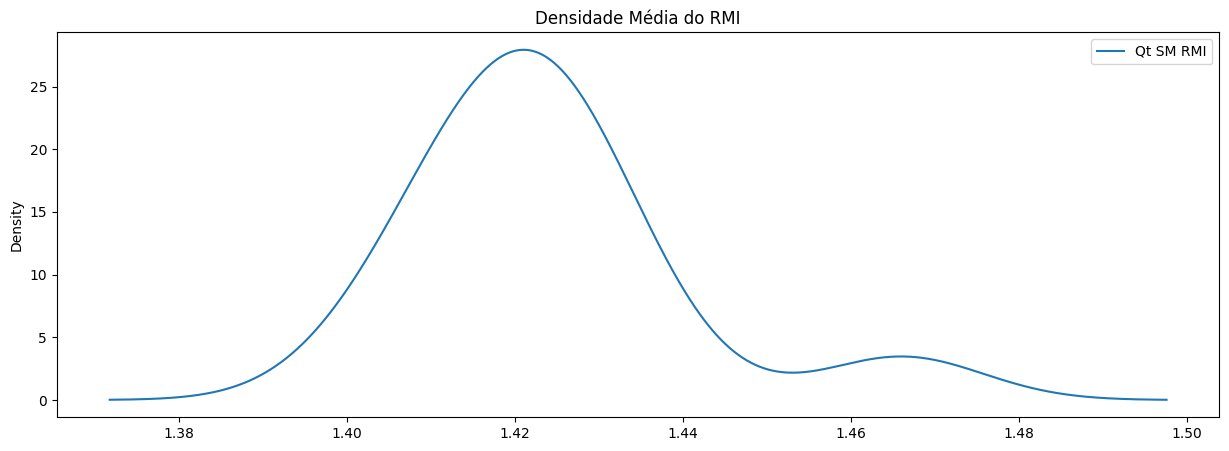

In [141]:
#Gráfico de Densidade da Média da QTD de SM da RMI
rmi_mes.plot(figsize=(15,5), kind='kde')
plt.title('Densidade Média do RMI')

A maior média de SM RMI é do mês de Janeiro, e a densidade média do RMI fica entre 1.4 e 1.44. Os estados com os maiores SM RMI são DF e SP.

Text(0.5, 1.0, 'RMI x Estado')

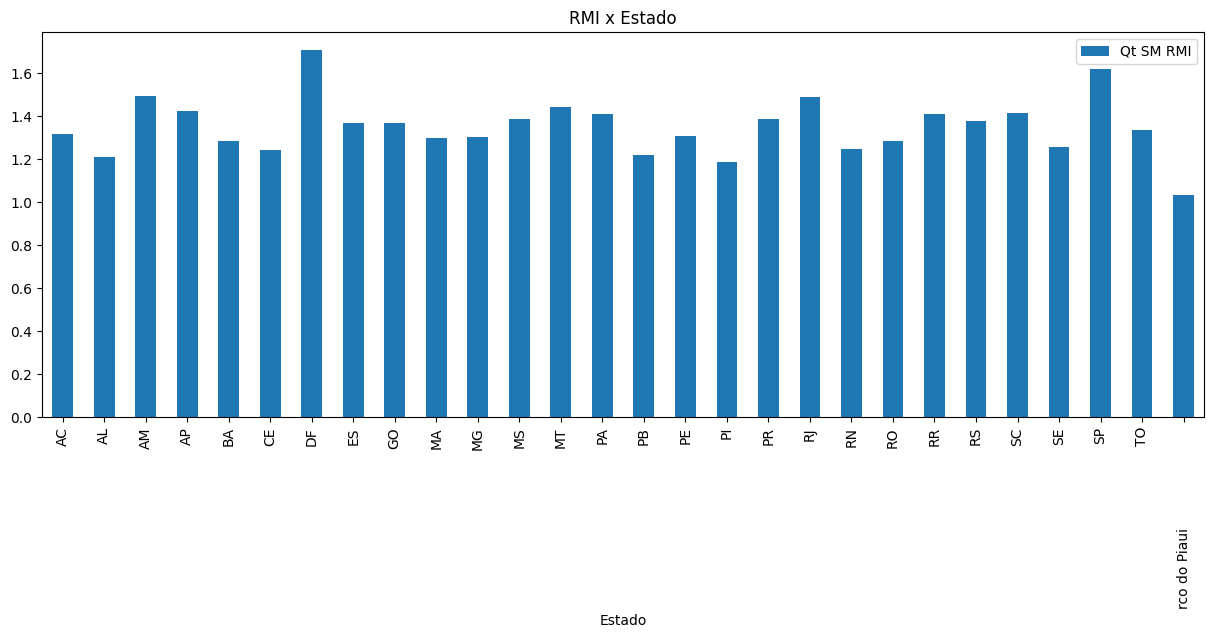

In [142]:
#Gráfico Barra Média de SM do RMI x Estado
rmi_est = df_ben.loc[:,['Estado','Qt SM RMI']]
rmi_est = rmi_est.groupby('Estado').mean()
rmi_est.plot(figsize=(15,5), kind='bar')
plt.title('RMI x Estado')

In [143]:
#Verificando a Quantidade de Processo Concedido por tipo de Despacho, separando os sexos
df_ben2 = df_ben[df_ben['Sexo'] == 'Masculino'].groupby('Despacho').agg({'Sexo':'count'})
df_ben3 = df_ben[df_ben['Sexo'] == 'Feminino'].groupby('Despacho').agg({'Sexo':'count'})
display(df_ben2)
display(df_ben3)
display(df_ben2.columns)

,Sexo
Despacho,
Acao Judicial,79399
Concessao Normal,853693
Recurso,1545
Revisao Administrativa,25018
Revisão Médica,22


,Sexo
Despacho,
Acao Judicial,83041
Concessao Normal,805362
Concessao com Diligencia (Rd ou Sp),1
Recurso,1667
Revisao Administrativa,33371
Revisão Médica,20


Index(['Sexo'], dtype='object')

Text(0.5, 1.0, 'Despacho por Sexo - Masculino')

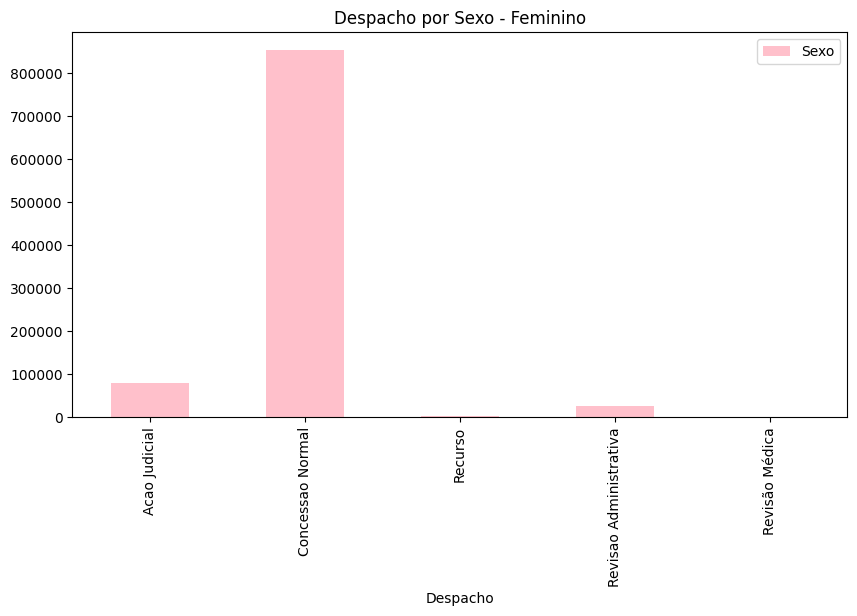

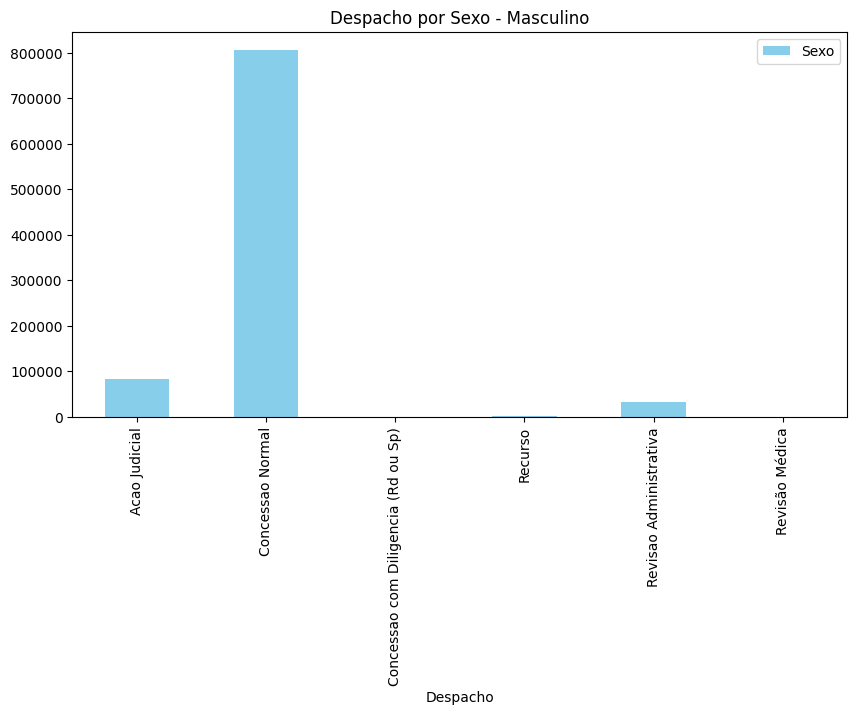

In [144]:
#Gráfico em Barras da Quantidade de Processo Concedido por tipo de Despacho, separando os sexos
df_ben2.plot(figsize=(10,5), kind='bar',color={"pink"})
plt.title('Despacho por Sexo - Feminino')
df_ben3.plot(figsize=(10,5), kind='bar',color={"Skyblue"})
plt.title('Despacho por Sexo - Masculino')

Tanto no Sexo masculino, quanto no feminino a maior parte dos benefícios são concedidos com Despacho Normal.

<Axes: >

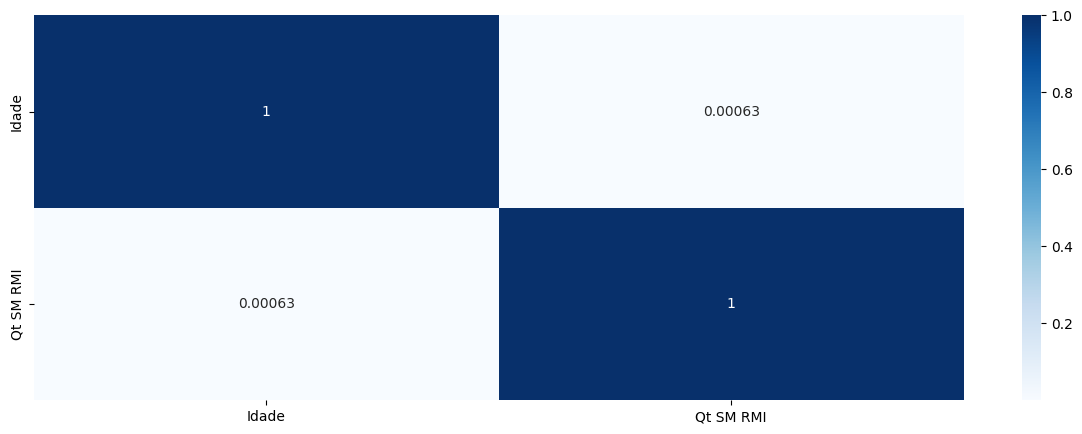

In [145]:
#Gráfico de correlação da Base de Dados de Benefícios
plt.figure(figsize=(15,5))
sns.heatmap(df_ben.corr(),annot= True,cmap='Blues')

Como podemos ver, não há muita correlaçao entre os atributos numéricos da base

Text(0.5, 1.0, 'Média de SM do RMI x Sexo')

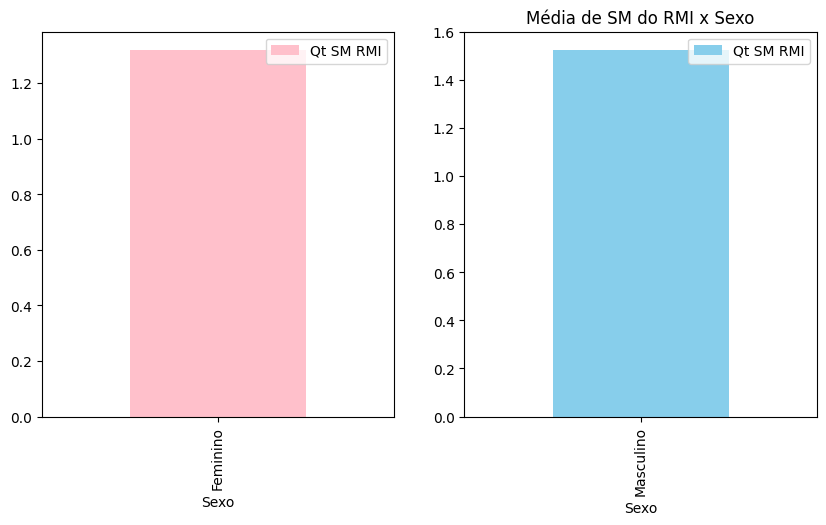

In [146]:
#Média de SM da RMI por Sexo
df_ben4 = df_ben[df_ben['Sexo'] == 'Masculino'].groupby('Sexo').agg({'Qt SM RMI':'mean'})
df_ben3 = df_ben.loc[:,['Sexo','Qt SM RMI']]
df_ben3 = df_ben[df_ben['Sexo'] == 'Feminino'].groupby('Sexo').agg({'Qt SM RMI':'mean'})
f, axes = plt.subplots(1, 2)
df_ben3.plot(figsize=(10,5), kind='bar', ax=axes[0],color={"pink"})
df_ben4.plot(figsize=(10,5), kind='bar', ax=axes[1],color={"Skyblue"})
plt.title('Média de SM do RMI x Sexo')

Text(0.5, 1.0, 'SM Máximo do RMI x Sexo')

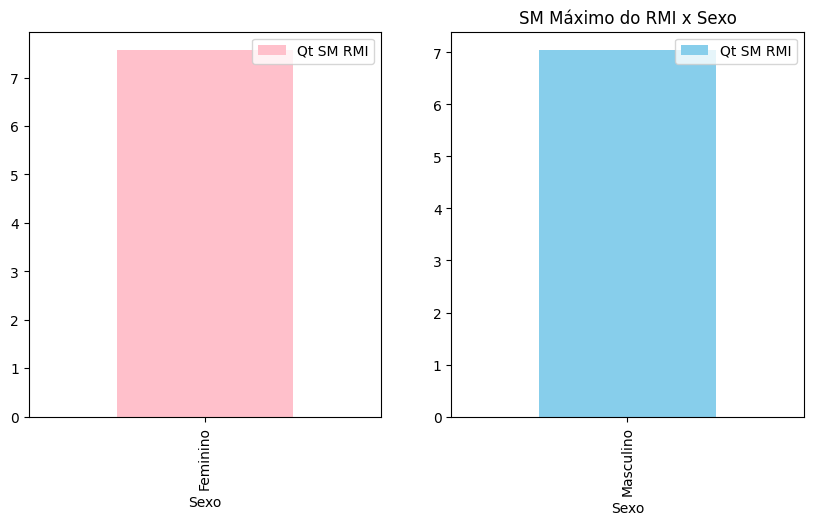

In [147]:
#SM Máximo da RMI por Sexo
df_ben4 = df_ben[df_ben['Sexo'] == 'Masculino'].groupby('Sexo').agg({'Qt SM RMI':'max'})
df_ben3 = df_ben.loc[:,['Sexo','Qt SM RMI']]
df_ben3 = df_ben[df_ben['Sexo'] == 'Feminino'].groupby('Sexo').agg({'Qt SM RMI':'max'})
f, axes = plt.subplots(1, 2)
df_ben3.plot(figsize=(10,5), kind='bar', ax=axes[0],color={"pink"})
df_ben4.plot(figsize=(10,5), kind='bar', ax=axes[1],color={"Skyblue"})
plt.title('SM Máximo do RMI x Sexo')

Podemos verificar que o Salário Masculino é maior na média do RMI e que o maior Salário do benefício é masculino.

## 4 - ML - Treino e Teste

---



Devido ao tamanho da planilha, a mesma será filtrada apenas para processos com Ação Judicial, pois com o tamanho total da planilha está estourando a memória no Colab

In [148]:
#Redução do DF para processos com Ação Judicial
df_ben = df_ben[df_ben['Despacho'] == 'Acao Judicial']
df_ben

,Competência,Espécie,CID,Despacho,Idade,Sexo,Zona,Estado,Filiação,Qt SM RMI
28,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,57,Masculino,Rural,AL,Segurado Especial,1.000
50,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,52,Masculino,Urbano,AL,Autônomo,1.000
104,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,45,Feminino,Urbano,AL,Autônomo,1.100
143,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,48,Masculino,Rural,AL,Segurado Especial,1.000
144,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,42,Feminino,Urbano,CE,Optante Pela Lei 6.,1.000
...,...,...,...,...,...,...,...,...,...,...
1883126,12,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,64,Masculino,Rural,PA,Segurado Especial,1.000
1883127,12,Auxílio Doenca por Acidente do Trabalho,Em Branco,Acao Judicial,50,Feminino,Urbano,DF,Desempregado,3.107
1883128,12,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,54,Feminino,Urbano,MT,Optante Pela Lei 6.,1.000
1883129,12,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,30,Masculino,Urbano,PA,Empregado,1.155


In [149]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = df_ben.values[:,0:9]
Y = df_ben.values[:,9]

In [150]:
print(X)

[['01' 'Auxílio Doenca Previdenciário' 'Em Branco' ... 'Rural' 'AL'
  'Segurado Especial  ']
 ['01' 'Auxílio Doenca Previdenciário' 'Em Branco' ... 'Urbano' 'AL'
  'Autônomo           ']
 ['01' 'Auxílio Doenca Previdenciário' 'Em Branco' ... 'Urbano' 'AL'
  'Autônomo           ']
 ...
 ['12' 'Auxílio Doenca Previdenciário' 'Em Branco' ... 'Urbano' 'MT'
  'Optante Pela Lei 6.']
 ['12' 'Auxílio Doenca Previdenciário' 'Em Branco' ... 'Urbano' 'PA'
  'Empregado          ']
 ['12' 'Auxílio Doenca Previdenciário' 'Em Branco' ... 'Urbano' 'GO'
  'Desempregado       ']]


In [151]:
# ordinal encoding para os atributos X
encoded_X = OrdinalEncoder().fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[  0.   0. 285.   0.  42.   1.   0.   1.   7.]
 [  0.   0. 285.   0.  37.   1.   1.   1.   0.]
 [  0.   0. 285.   0.  30.   0.   1.   1.   0.]
 [  0.   0. 285.   0.  33.   1.   0.   1.   7.]
 [  0.   0. 285.   0.  27.   0.   1.   5.   6.]]


In [152]:
df_ben

,Competência,Espécie,CID,Despacho,Idade,Sexo,Zona,Estado,Filiação,Qt SM RMI
28,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,57,Masculino,Rural,AL,Segurado Especial,1.000
50,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,52,Masculino,Urbano,AL,Autônomo,1.000
104,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,45,Feminino,Urbano,AL,Autônomo,1.100
143,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,48,Masculino,Rural,AL,Segurado Especial,1.000
144,01,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,42,Feminino,Urbano,CE,Optante Pela Lei 6.,1.000
...,...,...,...,...,...,...,...,...,...,...
1883126,12,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,64,Masculino,Rural,PA,Segurado Especial,1.000
1883127,12,Auxílio Doenca por Acidente do Trabalho,Em Branco,Acao Judicial,50,Feminino,Urbano,DF,Desempregado,3.107
1883128,12,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,54,Feminino,Urbano,MT,Optante Pela Lei 6.,1.000
1883129,12,Auxílio Doenca Previdenciário,Em Branco,Acao Judicial,30,Masculino,Urbano,PA,Empregado,1.155


In [153]:
# one hot encode para os atributos X
encoded_X = OneHotEncoder(sparse=False).fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :])

Atributos transformados:
[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]]


In [154]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, random_state=10)

In [155]:
X_treino

array([['02', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'Urbano', 'SP', 'Autônomo           '],
       ['06', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'Urbano', 'AL', 'Desempregado       '],
       ['06', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'Urbano', 'PI', 'Autônomo           '],
       ...,
       ['08', 'Auxílio Doenca Previdenciário',
        'F33.9 Transt Depressivo Recorrente s/Especifi', ..., 'Urbano',
        'PR', 'Facultativo        '],
       ['08', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'Urbano', 'BA', 'Desempregado       '],
       ['07', 'Auxílio Doenca Previdenciário', 'Em Branco', ...,
        'Urbano', 'PI', 'Desempregado       ']], dtype=object)